In [100]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import csv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

train=pd.read_csv("d:/dev/python/kaggle/titanic/train.csv")
test=pd.read_csv("d:/dev/python/kaggle/titanic/test.csv")

# have a look at the ds
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
# check missing values
train.isnull().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Pclass__1        0
Pclass__2        0
Pclass__3        0
Sex__female      0
Embarked__C      0
Embarked__Q      0
Embarked__S      0
dtype: int64

In [18]:
# check null accuracy
train['Survived'].value_counts(normalize=True) 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

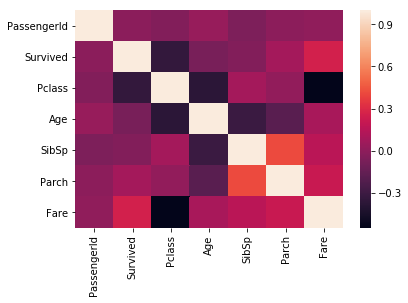

In [19]:
# look at the heatmap of the correlation matrix of our dataset
sns.heatmap(train.corr())

In [51]:
# numerical correlations
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Pclass__1      0.285904
Pclass__2      0.093349
Pclass__3     -0.322308
Sex__female    0.543351
Embarked__C    0.168240
Embarked__Q    0.003650
Embarked__S   -0.155660
Name: Survived, dtype: float64

In [101]:
# drop complicated columns first
train = train.drop(['Name','Cabin','Ticket'],axis=1)
test = test.drop(['Name','Cabin','Ticket'],axis=1)

In [102]:
# dummify features

train = pd.get_dummies(train, 
               columns = ['Pclass', 'Sex', 'Embarked'],  # which columns to dummify
               prefix_sep='__')  # the separator between the prefix (column name) and cell value

train = train.drop(['Sex__male'],axis=1) # drop because of dummy trap
test = pd.get_dummies(test, 
               columns = ['Pclass', 'Sex', 'Embarked'],  # which columns to dummify
               prefix_sep='__')  # the separator between the prefix (column name) and cell value

test = test.drop(['Sex__male'],axis=1) # drop because of dummy trap
test.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Sex__female,Embarked__C,Embarked__Q,Embarked__S
0,892,34.5,0,0,7.8292,0,0,1,0,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,1


In [103]:
# imput null ages with mean TODO: check age survived
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# imput null ages 0
#train['Age'].fillna(0,inplace=True)

train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Sex__female,Embarked__C,Embarked__Q,Embarked__S
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [74]:
# while predicting turned out that there is a NaN somewhere
test.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           1
Pclass__1      0
Pclass__2      0
Pclass__3      0
Sex__female    0
Embarked__C    0
Embarked__Q    0
Embarked__S    0
dtype: int64

In [104]:
# fill missing fare

test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [105]:
X = train.drop(['PassengerId','Survived'], axis=1)
# create our feature matrix by removing the response variable
print ("learning from {} rows".format(X.shape[0]))
y = train['Survived']

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, knn_params)
grid.fit(X, y)

print (grid.best_score_, grid.best_params_)

learning from 891 rows
0.7070707070707071 {'n_neighbors': 5}


In [88]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Sex__female,Embarked__C,Embarked__Q,Embarked__S
0,892,34.5,0,0,7.8292,0,0,1,0,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,1


In [106]:
y_test = train['Survived']
x_test = test.drop(['PassengerId'],axis=1)

knn.fit(X,y)
preds = knn.predict(x_test)
predicted = pd.DataFrame()

predicted['PassengerId'] = test['PassengerId']
predicted['Survived'] = preds
predicted.to_csv('d:/dev/python/kaggle/titanic/submission.csv', index=False,quoting=csv.QUOTE_NONNUMERIC)

predicted.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
